# RSI mix Ema - Strategy - Backtesting 

### Import Library

In [27]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)

### Load Price Data

In [28]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [29]:
data = dataset.copy()

In [30]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [31]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627


In [32]:
def get_signal(r):
    signal = ''
    if r['RSI'] < 40 and r['ema_fast'] > r['ema_low'] + 3:
        signal = 'long'
    elif r['RSI'] > 60 and r['ema_fast'] < r['ema_low'] - 3:
        signal = 'short'
    return signal

In [33]:
def prepare_data(data):
    data['max_in_range'] = data['High'].rolling(10).max()
    data['min_in_range'] = data['Low'].rolling(10).min()
    data["ema_fast"] = ta.ema(data["Close"], length=20)
    data["ema_low"] = ta.ema(data["Close"], length=250)
    data['RSI'] = ta.rsi(data["Close"], length=14)
    data['signal'] = data.apply(lambda r: get_signal(r), axis=1)
    return data

In [34]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [35]:
prepared_data

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_fast,ema_low,RSI,signal
Date,,,,,,,,,,,
2020-11-06 14:10:00,908.0,911.9,907.5,911.0,5068,911.9,903.3,907.594675,908.782400,61.773386,
2020-11-06 14:15:00,911.0,912.7,910.5,910.6,5948,912.7,903.5,907.880896,908.796883,59.952872,
2020-11-06 14:20:00,910.7,911.2,909.4,910.9,4466,912.7,903.5,908.168430,908.813641,60.883966,
2020-11-06 14:25:00,910.5,911.0,908.5,910.0,3602,912.7,904.4,908.342865,908.823094,56.630178,
2020-11-06 14:30:00,910.5,910.7,910.5,910.7,78,912.7,906.2,908.567354,908.838049,59.027913,
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524,1300.9,1295.6,1297.302274,1287.412327,48.873066,
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161,1300.9,1295.9,1297.283010,1287.489520,49.314332,
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627,1300.9,1295.9,1297.389390,1287.576456,54.778494,


In [36]:
prepared_data[prepared_data.signal != ''].tail(20)

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_fast,ema_low,RSI,signal
Date,,,,,,,,,,,
2024-11-20 13:15:00,1274.6,1278.9,1274.6,1278.1,8990,1278.9,1268.1,1269.698242,1278.592985,77.911291,short
2024-11-20 13:20:00,1278.5,1279.3,1276.6,1277.5,9950,1279.3,1269.3,1270.441267,1278.584276,75.302649,short
2024-11-20 13:25:00,1277.9,1277.9,1275.7,1276.6,5544,1279.3,1269.3,1271.027813,1278.568465,71.438764,short
2024-11-20 13:30:00,1276.6,1278.4,1276.2,1276.2,4094,1279.3,1269.3,1271.520402,1278.549593,69.726334,short
2024-11-20 13:35:00,1276.2,1280.0,1276.1,1277.0,7925,1280.0,1270.4,1272.042269,1278.537245,71.212599,short
2024-11-20 13:40:00,1276.9,1277.7,1276.3,1277.5,4768,1280.0,1271.1,1272.562053,1278.528980,72.133428,short
2024-11-20 13:45:00,1277.2,1279.5,1275.1,1276.4,8110,1280.0,1271.1,1272.927571,1278.512016,67.051890,short
2024-11-20 13:50:00,1276.0,1278.5,1275.6,1278.2,4780,1280.0,1271.1,1273.429707,1278.509530,70.690470,short
2024-11-20 13:55:00,1278.3,1278.7,1275.5,1276.0,5262,1280.0,1272.5,1273.674497,1278.489534,61.719152,short


In [37]:
class MainStrategy(Strategy):
    max_sl = 3.1
    trailing_sl = 7
    tp_step = 27
    def init(self):
        super().init()

    def next(self):
        super().next()
        close_price = self.data.Close[-1]
        if self.position.is_long:
            max_in_range = self.data.max_in_range[-1]
            if close_price < max_in_range - self.trailing_sl:
                self.position.close()
        elif self.position.is_short:
            min_in_range = self.data.min_in_range[-1]
            if close_price > min_in_range + self.trailing_sl:
                self.position.close()
 
        signal = self.data.signal[-1]
        if self.position:
            if signal == 'long' and self.position.is_short:
                self.position.close()
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short' and self.position.is_long:
                sell_price = close_price
                self.position.close()
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)
        else:
            if signal == 'long':
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short':
                sell_price = close_price
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)

In [38]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [39]:
stats

Start                     2020-11-06 14:10:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:55:00
Exposure Time [%]                   36.155682
Equity Final [$]                     9541.084
Equity Peak [$]                   10085.50959
Return [%]                           -4.58916
Buy & Hold Return [%]               42.502744
Return (Ann.) [%]                   -1.161851
Volatility (Ann.) [%]                1.207909
Sharpe Ratio                        -0.961869
Sortino Ratio                       -1.346346
Calmar Ratio                        -0.199196
Max. Drawdown [%]                   -5.832714
Avg. Drawdown [%]                   -0.165056
Max. Drawdown Duration     1412 days 21:55:00
Avg. Drawdown Duration       32 days 17:26:00
# Trades                                 2085
Win Rate [%]                        33.333333
Best Trade [%]                       3.198112
Worst Trade [%]                     -1.777205
Avg. Trade [%]                    

In [40]:
stats['_trades'].tail(20)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
2065,-1,51277,51279,1272.11825,1274.6,-2.48175,-0.001951,2024-11-18 14:05:00,2024-11-18 14:15:00,None,0 days 00:10:00
2066,-1,51280,51281,1277.51663,1278.8,-1.28337,-0.001005,2024-11-18 14:20:00,2024-11-18 14:25:00,None,0 days 00:05:00
2067,-1,51282,51283,1274.61750,1273.2,1.41750,0.001112,2024-11-18 14:30:00,2024-11-18 14:45:00,None,0 days 00:15:00
2068,-1,51320,51348,1271.21852,1261.2,10.01852,0.007881,2024-11-19 13:25:00,2024-11-20 10:05:00,None,0 days 20:40:00
2069,-1,51354,51354,1264.72047,1268.1,-3.37953,-0.002672,2024-11-20 10:35:00,2024-11-20 10:35:00,None,0 days 00:00:00
2070,-1,51355,51356,1269.11915,1268.4,0.71915,0.000567,2024-11-20 10:40:00,2024-11-20 10:45:00,None,0 days 00:05:00
2071,-1,51357,51358,1267.71957,1267.3,0.41957,0.000331,2024-11-20 10:50:00,2024-11-20 10:55:00,None,0 days 00:05:00
2072,-1,51359,51360,1267.41966,1269.4,-1.98034,-0.001562,2024-11-20 11:00:00,2024-11-20 11:05:00,None,0 days 00:05:00
2073,-1,51361,51361,1270.41876,1273.7,-3.28124,-0.002583,2024-11-20 11:10:00,2024-11-20 11:10:00,None,0 days 00:00:00
2074,-1,51362,51363,1271.61840,1270.2,1.41840,0.001115,2024-11-20 11:15:00,2024-11-20 11:20:00,None,0 days 00:05:00


In [41]:
stats['_trades']['PnL'].min()

-22.98792999999978

In [42]:
trades = stats['_trades']

In [43]:
trades[trades.PnL < -3.1]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
0,1,105,107,924.87738,921.0,-3.87738,-0.004192,2020-11-10 14:25:00,2020-11-10 14:45:00,None,0 days 00:20:00
3,1,112,139,921.37633,918.0,-3.37633,-0.003664,2020-11-11 09:20:00,2020-11-11 13:00:00,None,0 days 03:40:00
5,1,287,287,931.47936,928.2,-3.27936,-0.003521,2020-11-16 11:20:00,2020-11-16 11:20:00,None,0 days 00:00:00
9,-1,345,351,923.02301,926.6,-3.57699,-0.003875,2020-11-17 13:20:00,2020-11-17 13:50:00,None,0 days 00:30:00
14,1,601,607,956.88698,953.4,-3.48698,-0.003644,2020-11-24 13:25:00,2020-11-24 13:55:00,None,0 days 00:30:00
...,...,...,...,...,...,...,...,...,...,...,...
2069,-1,51354,51354,1264.72047,1268.1,-3.37953,-0.002672,2024-11-20 10:35:00,2024-11-20 10:35:00,None,0 days 00:00:00
2073,-1,51361,51361,1270.41876,1273.7,-3.28124,-0.002583,2024-11-20 11:10:00,2024-11-20 11:10:00,None,0 days 00:00:00
2076,-1,51368,51368,1272.11825,1275.6,-3.48175,-0.002737,2024-11-20 13:10:00,2024-11-20 13:10:00,None,0 days 00:00:00
2077,-1,51369,51369,1274.21762,1277.6,-3.38238,-0.002654,2024-11-20 13:15:00,2024-11-20 13:15:00,None,0 days 00:00:00


In [44]:
trades[trades.PnL < -3.1]['PnL'].sum()

-2255.8930699999282

In [45]:
len(trades[trades.PnL < -3.1]) * -3.1

-1832.1000000000001

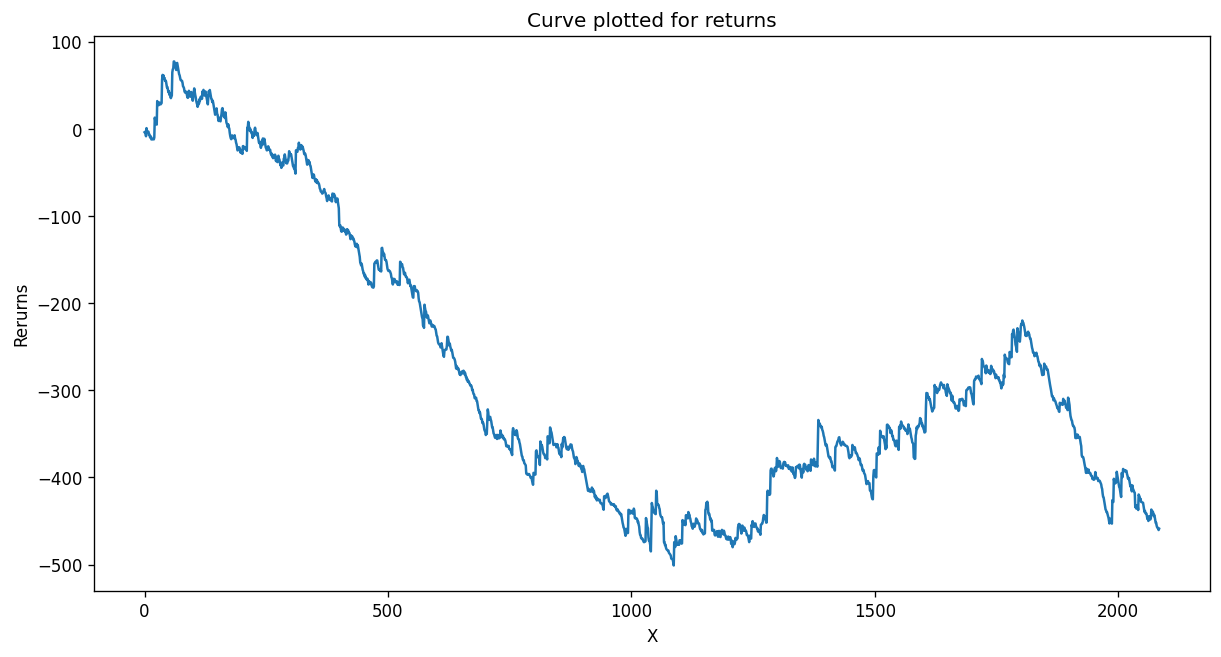

In [46]:
copy_trades = trades.copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()

## Optimize

In [21]:
max_sl_params = [x / 10.0 for x in range(20, 50, 2)]
trailing_sl_params = [x / 10.0 for x in range(30, 100, 5)]
tp_step_params = [x for x in range(10, 30)]

In [22]:
trailing_sl_params

[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

In [23]:
optimize_stats, optimize_table = bt.optimize(
                                      trailing_sl=trailing_sl_params,
                                      tp_step=tp_step_params,
                    maximize='Return [%]', 
                    random_state=0,
                    return_heatmap=True)

In [24]:
optimize_stats

Start                     2020-11-06 14:10:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:55:00
Exposure Time [%]                   52.833666
Equity Final [$]                   9839.84182
Equity Peak [$]                   10041.80271
Return [%]                          -1.601582
Buy & Hold Return [%]               42.502744
Return (Ann.) [%]                   -0.405612
Volatility (Ann.) [%]                 1.52549
Sharpe Ratio                         -0.26589
Sortino Ratio                       -0.382704
Calmar Ratio                        -0.106204
Max. Drawdown [%]                   -3.819175
Avg. Drawdown [%]                    -0.21304
Max. Drawdown Duration     1433 days 19:50:00
Avg. Drawdown Duration       64 days 08:07:00
# Trades                                 2307
Win Rate [%]                        31.209363
Best Trade [%]                       3.198112
Worst Trade [%]                      -1.65552
Avg. Trade [%]                    

In [25]:
optimize_table

trailing_sl  tp_step
3.0          10        -14.255848
             11        -13.933477
             12        -13.710826
             13        -13.704226
             14        -13.539226
                          ...    
9.5          25         -3.654004
             26         -3.243244
             27         -3.326353
             28         -2.921338
             29         -2.713230
Name: Return [%], Length: 280, dtype: float64

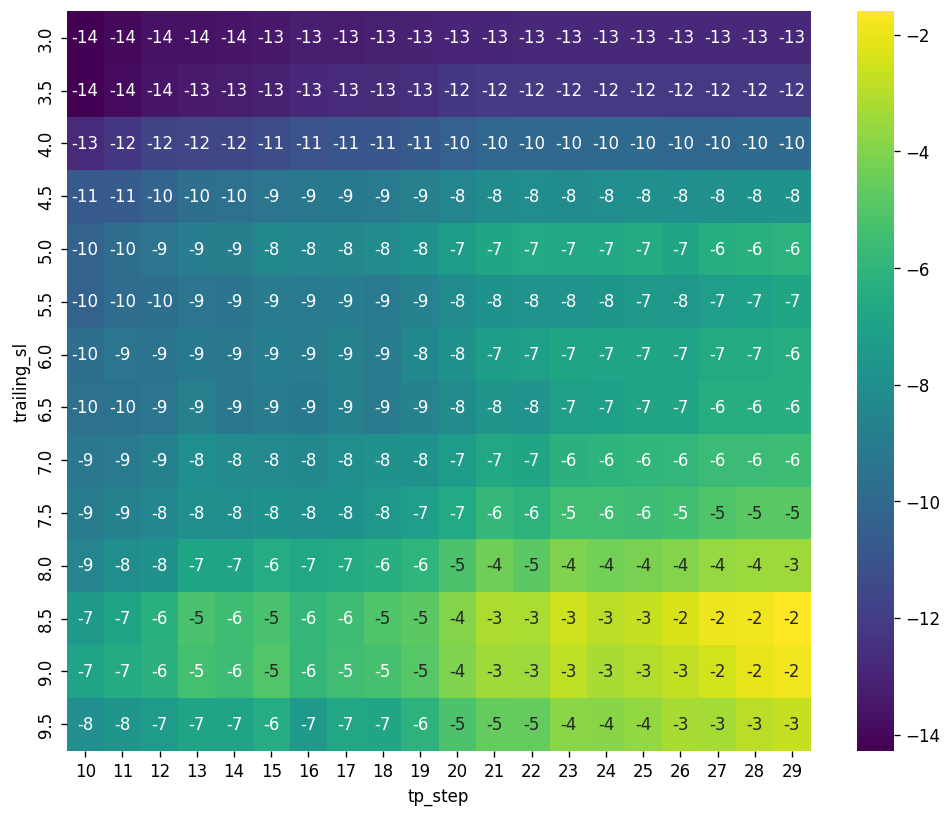

In [26]:
import seaborn as sns
# Convert multiindex series to dataframe
heatmap_df = optimize_table.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()